In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [43]:
cd= pd.read_csv('/content/Churn_Modelling.csv', encoding='latin-1')

In [44]:
cd.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
cd.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [47]:
cd.drop(columns = ['RowNumber','CustomerId','Surname'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [49]:
cd['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [50]:
data =pd.get_dummies(cd, drop_first=True)

In [51]:
cd

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: ylabel='Frequency'>

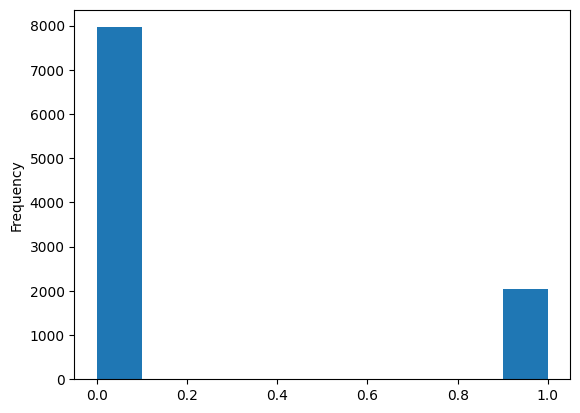

In [52]:
cd.Exited.plot.hist()

In [53]:
(cd.Exited == 0).sum()

7963

In [54]:
cd2=cd.drop(columns='Exited')

<Axes: title={'center': 'Correlation with Exited'}>

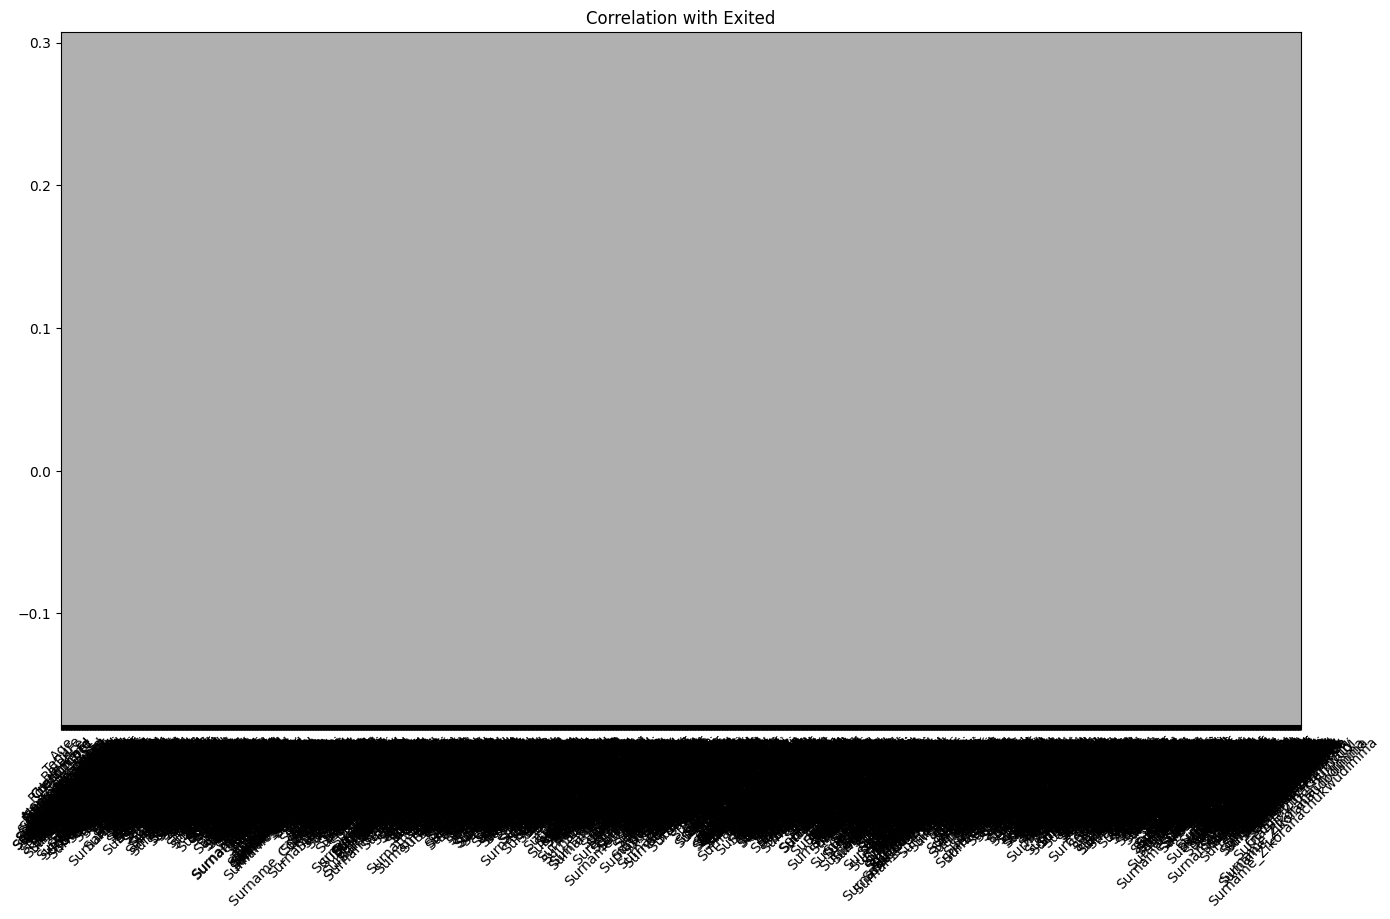

In [55]:

cd2_encoded = pd.get_dummies(cd2)

cd2_encoded.corrwith(cd['Exited']).plot.bar(
    figsize=(16,9),
    title='Correlation with Exited',
    rot=45,
    grid=True
)

<Axes: title={'center': 'Correlation with Exited'}>

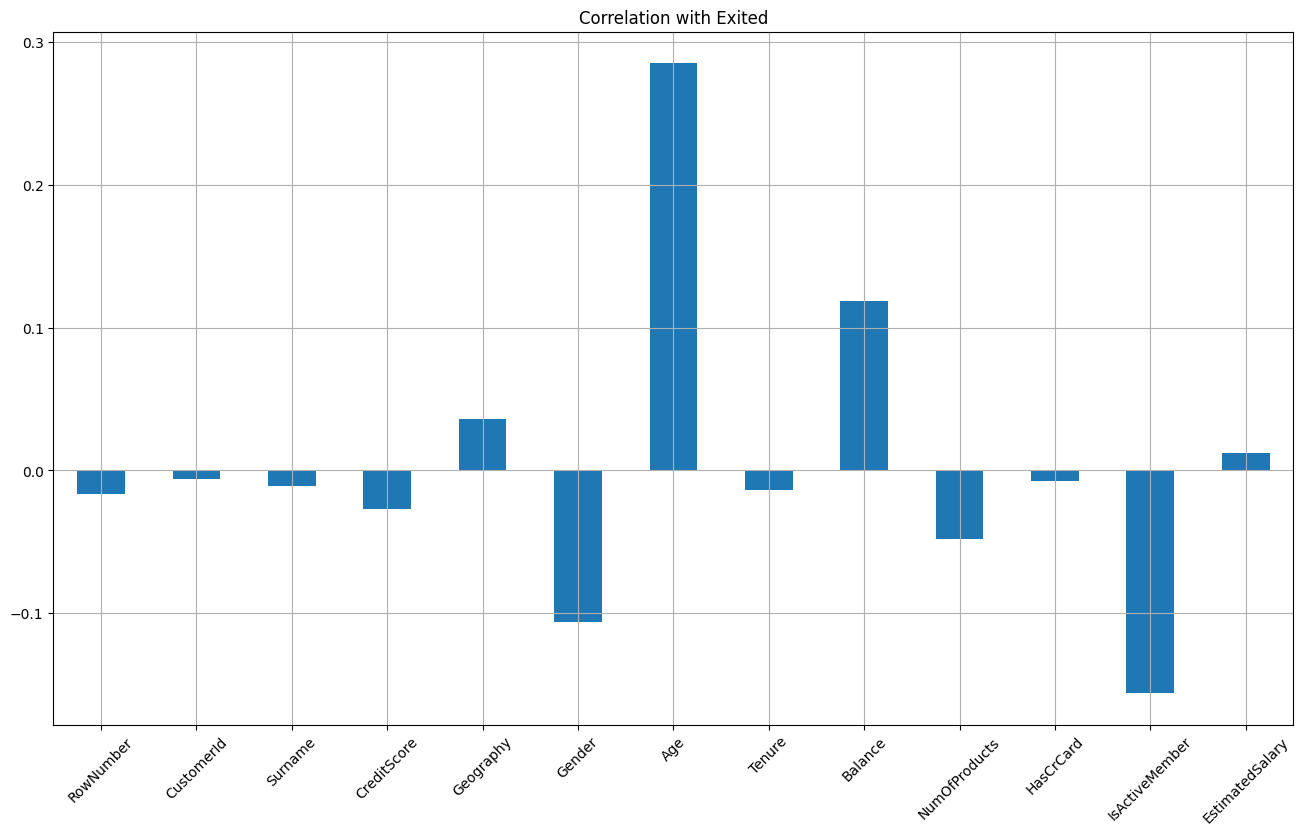

In [56]:

for column in cd2.columns:
    if cd2[column].dtype == object:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        cd2[column] = le.fit_transform(cd2[column])


cd2.corrwith(cd['Exited']).plot.bar(
    figsize=(16,9),
    title='Correlation with Exited',
    rot=45,
    grid=True
)

<Axes: >

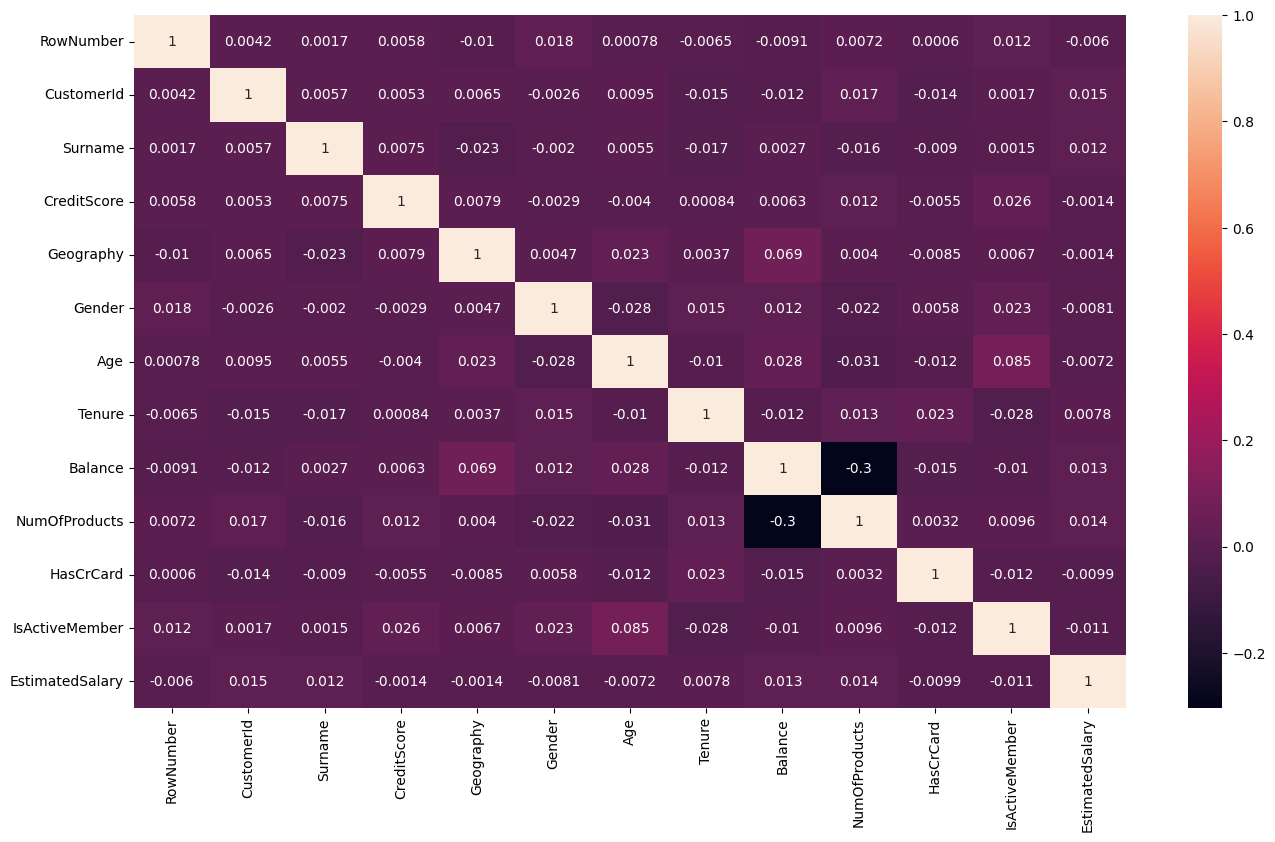

In [57]:
plt.figure(figsize=(16,9))
sns.heatmap(cd2.corr(), annot=True)

In [58]:
x=cd.drop(columns='Exited')
y=cd['Exited']

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
xtest.shape

(2000, 13)

In [61]:
cd

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Geography', ylabel='count'>

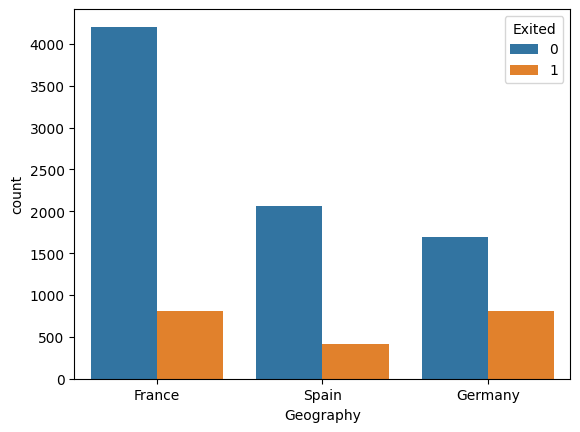

In [62]:
sns.countplot(x='Geography',hue='Exited',data=cd)

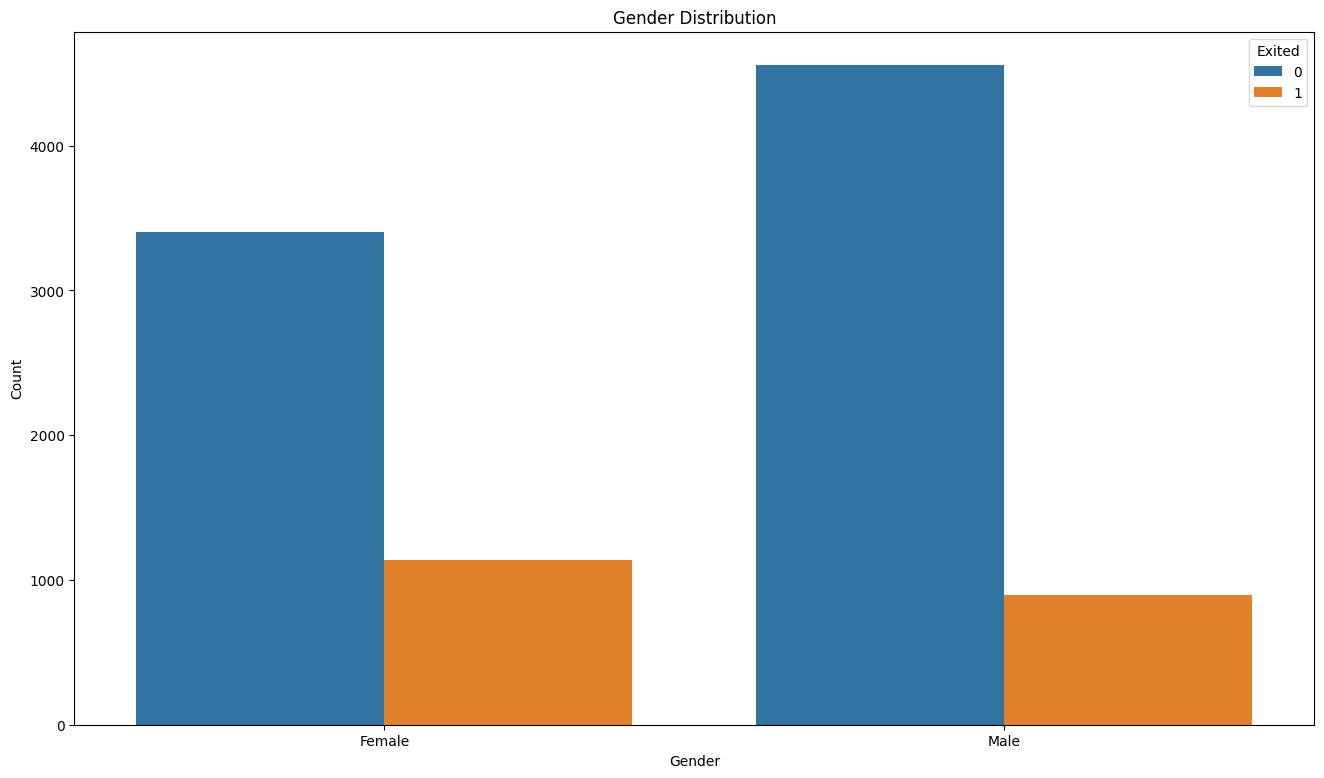

In [63]:
plt.figure(figsize=(16,9))
sns.countplot(x='Gender',hue='Exited',data=cd)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [64]:
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
cd['Gender_Numeric'] = cd['Gender'].map({'Female': 0, 'Male': 1})


<ipython-input-66-bf3b7b990e23>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cd.Gender_Numeric, kde=True, color='red')


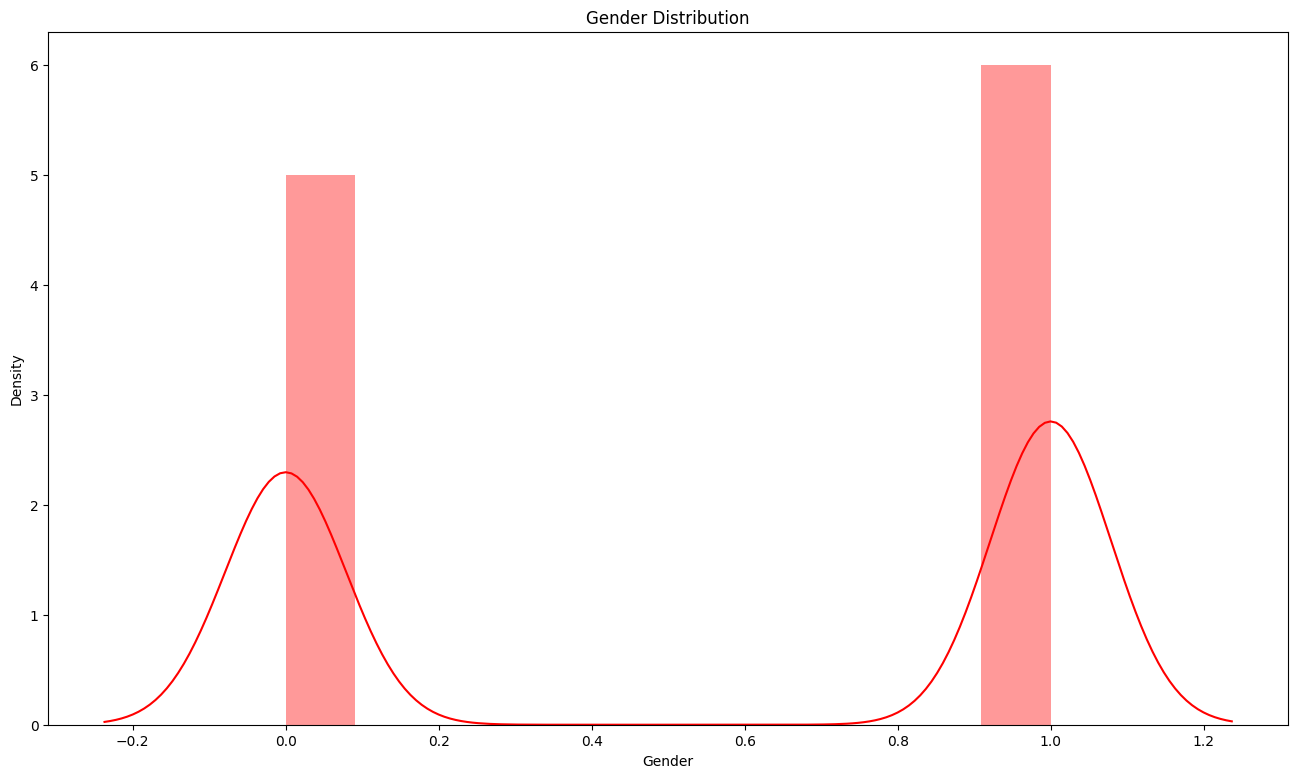

In [66]:
plt.figure(figsize=(16,9))
sns.distplot(cd.Gender_Numeric, kde=True, color='red')
plt.xlabel('Gender')
plt.ylabel('Density')
plt.title('Gender Distribution')
plt.show()

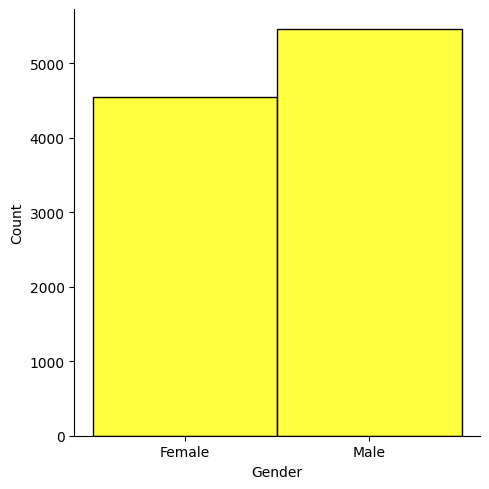

In [67]:
sns.displot(cd.Gender , color ='yellow')

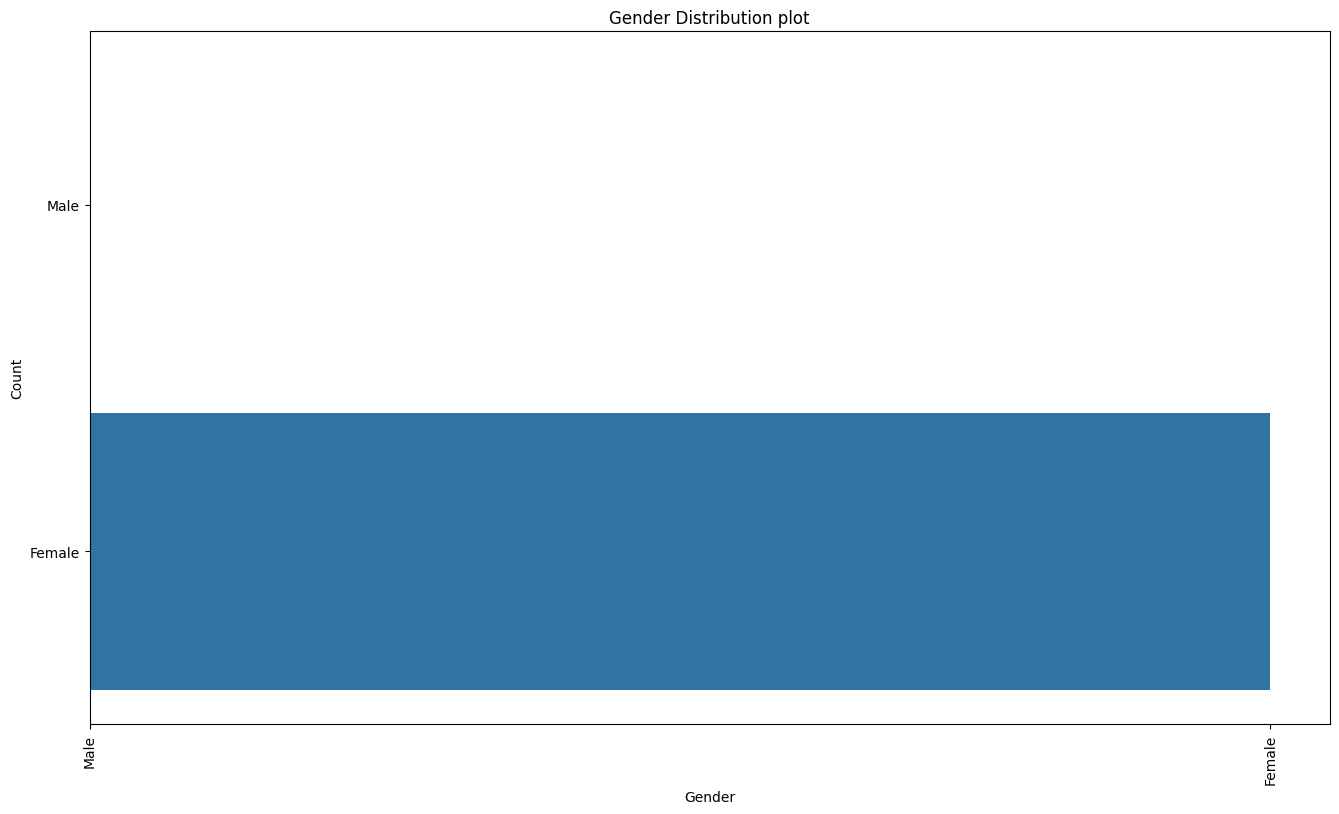

In [68]:
plt.figure(figsize=(16,9))
count1=cd.Gender.value_counts()
sns.barplot(x=count1.index, y=count1.index, orient ='h')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution plot')
plt.xticks(rotation=90)
plt.show()


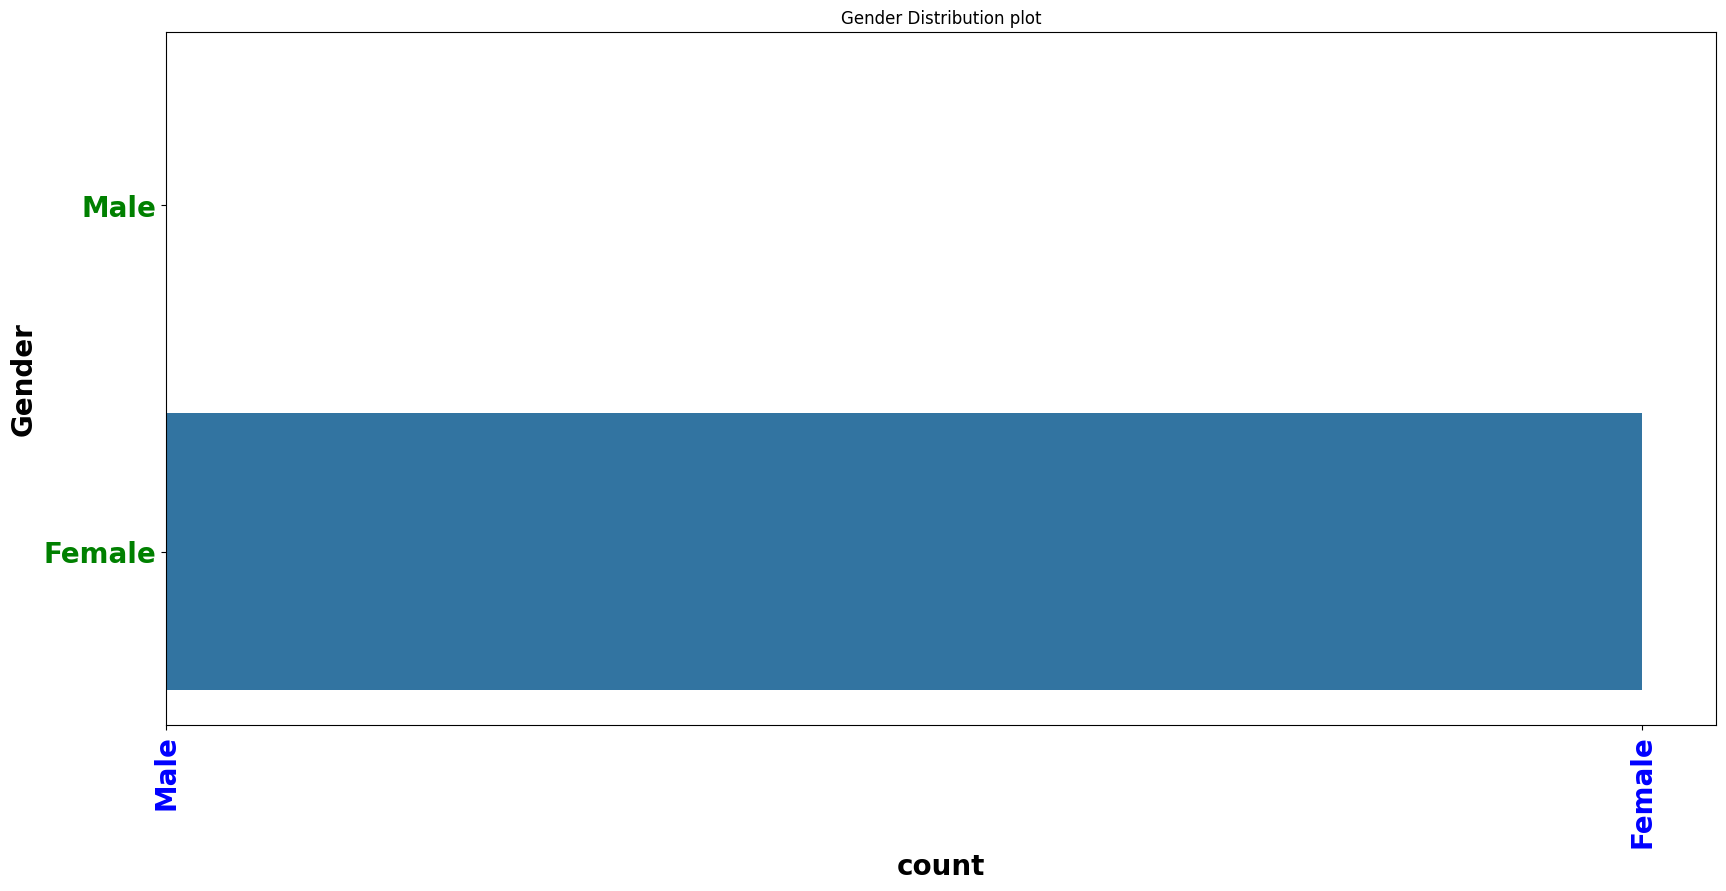

In [69]:
plt.figure(figsize=(20,9))
count1  = cd.Gender.value_counts()
sns.barplot(x=count1.index, y=count1.index, orient ='h')
plt.xlabel('count',fontsize= 20 , fontweight='bold')
plt.ylabel('Gender',fontsize= 20 , fontweight='bold')
plt.title('Gender Distribution plot')
plt.xticks(rotation=90 , fontsize=20,fontweight='bold',color ='blue')
plt.yticks( fontsize=20,fontweight='bold',color ='green')
plt.show()

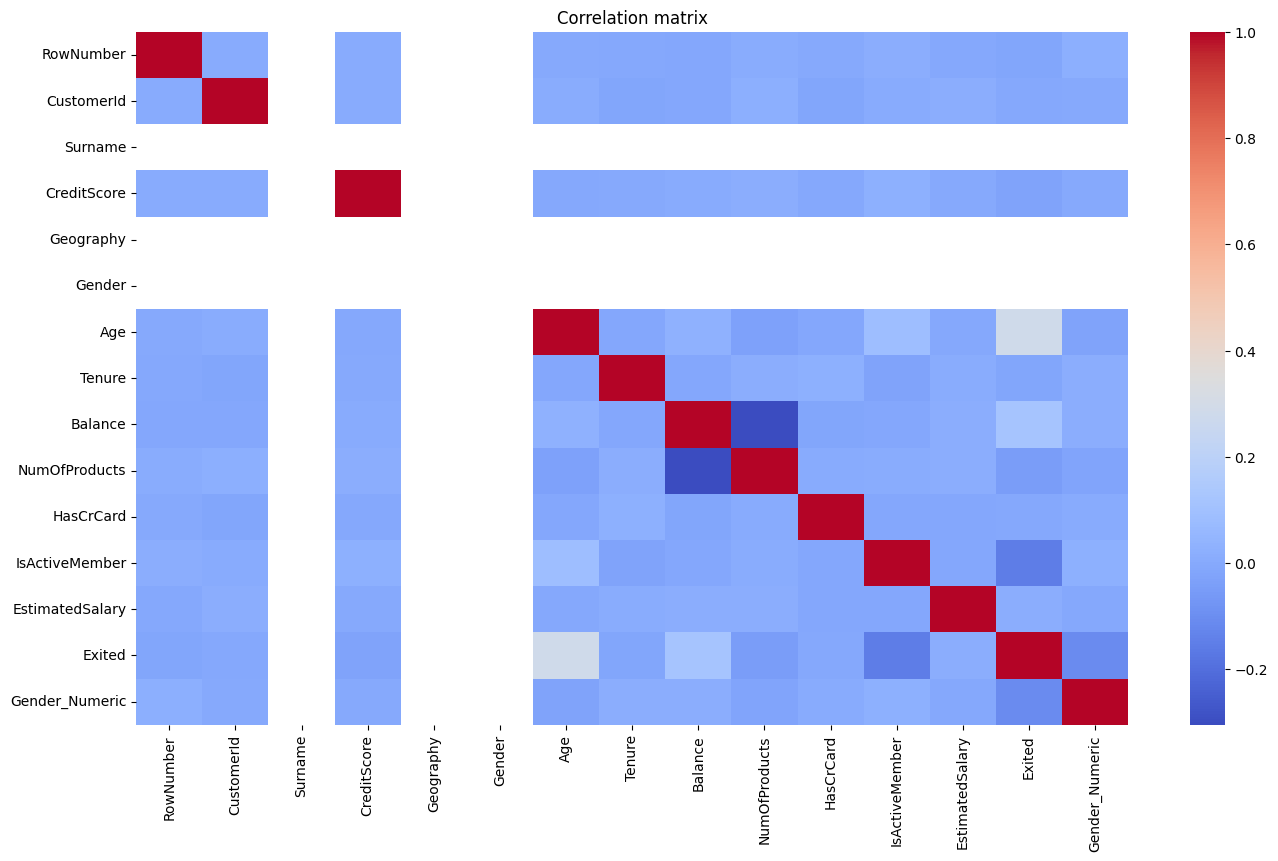

In [70]:
for column in cd.columns:
    if cd[column].dtype == 'object':
        try:
            cd[column] = pd.to_numeric(cd[column], errors='coerce')

        except:
            pass

correlation_matrix = cd.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',fmt=".2f")
plt.title('Correlation matrix')
plt.show()

In [71]:
cd.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Numeric
0,1,15634602,NaN,619,NaN,NaN,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,NaN,608,NaN,NaN,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,NaN,502,NaN,NaN,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,NaN,699,NaN,NaN,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,NaN,850,NaN,NaN,43,2,125510.82,1,1,1,79084.10,0,0


In [72]:
cd.drop(labels=['RowNumber','CustomerId','Surname'],axis =1,inplace=True)

In [73]:
cd=pd.get_dummies(cd,drop_first=True)

In [74]:
cd.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Numeric
0,619,NaN,NaN,42,2,0.00,1,1,1,101348.88,1,0
1,608,NaN,NaN,41,1,83807.86,1,0,1,112542.58,0,0
2,502,NaN,NaN,42,8,159660.80,3,1,0,113931.57,1,0
3,699,NaN,NaN,39,1,0.00,2,0,0,93826.63,0,0
4,850,NaN,NaN,43,2,125510.82,1,1,1,79084.10,0,0


In [75]:
x=cd.drop(labels='Exited',axis=1)
y=cd['Exited']

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [78]:
imp = SimpleImputer(strategy='mean')
xtrain = imp.fit_transform(xtrain)
xtest = imp.transform(xtest)

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

lg = LogisticRegression()
lg.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [1 2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [1 2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LogisticRegression()

In [79]:
print("Logistic Regression Model")
print(confusion_matrix(ytest, lg.predict(xtest)))
print(classification_report(ytest, lg.predict(xtest)))
print(accuracy_score(ytest,lg.predict(xtest)))
print(f1_score(ytest,lg.predict(xtest)))
print(precision_score(ytest,lg.predict(xtest)))
print(recall_score(ytest,lg.predict(xtest)))


Logistic Regression Model
[[1562   45]
 [ 327   66]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.59      0.17      0.26       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000

0.814
0.2619047619047619
0.5945945945945946
0.16793893129770993


In [80]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [81]:
rfp=rfc.predict(xtest)

In [82]:
print("Randpm Forest Model")
print(confusion_matrix(ytest, lg.predict(xtest)))
print(classification_report(ytest, lg.predict(xtest)))
print(accuracy_score(ytest,lg.predict(xtest)))
print(f1_score(ytest,lg.predict(xtest)))
print(precision_score(ytest,lg.predict(xtest)))
print(recall_score(ytest,lg.predict(xtest)))

Randpm Forest Model
[[1562   45]
 [ 327   66]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.59      0.17      0.26       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000

0.814
0.2619047619047619
0.5945945945945946
0.16793893129770993
